In [30]:
import numpy as np
np.random.seed(0)
import mltools as ml
import matplotlib.pyplot as plt
%matplotlib inline

## Extract and split data

In [48]:
curve=np.genfromtxt("data/curve80.txt")
print (curve.shape)
X=curve[:,0] #features
#X=X #[:,np.newaxis] #force to be shape (M,1)
y=curve[:,1] #target 
#y=y #[:,np.newaxis]
print(X.shape,y.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10) #ml.splitData(X, y, 0.70)
#print(X_train.shape)

(80, 2)
(80,) (80,)


## Using linear regression

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# train the model
lr = LinearRegression().fit(X_train[:,np.newaxis], y_train)
ytrain_predict=lr.predict(X_train[:,np.newaxis])
ytest_predict = lr.predict(X_test[:,np.newaxis])

mse_train = mean_squared_error(y_train,ytrain_predict)
mse_test = mean_squared_error(y_test,ytest_predict)

print("Weights (coefficients): {}".format(lr.coef_))
print("Bias (intercept): {}".format(lr.intercept_))
print("Training MSE: ", mse_train)
print("Test MSE:", mse_test)

Weights (coefficients): [ 0.83171133]
Bias (intercept): -2.643188454023278
Training MSE:  1.25119971231
Test MSE: 1.84324791271


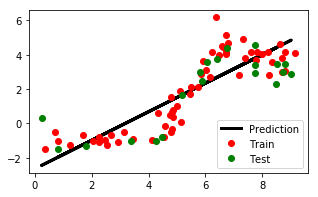

In [50]:
plt.rcParams['figure.figsize'] = (5.0, 3.0)
lines = plt.plot(X_test,ytest_predict,'k-',X_train,y_train,'r.',X_test,y_test,'g.', linewidth=3,markersize=12)
plt.legend(['Prediction','Train','Test'],loc='lower right');


# Polynomial features

In [51]:
# create polynomial features
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2)
X_train2 = poly.fit_transform(X_train[:,np.newaxis])

print (X_train2[0:6,:])# look at the same data points -- same values



[[  1.           5.9101382   34.92973354]
 [  1.           4.8271889   23.30175268]
 [  1.           5.0115207   25.11533973]
 [  1.           2.2695853    5.15101743]
 [  1.           4.5506912   20.7087904 ]
 [  1.           6.578341    43.27457031]]


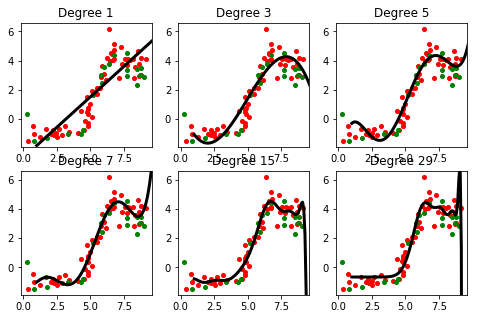

In [52]:
import mltools.transforms as xform

degrees = np.array(range(1,30))
learners = [ [] ]*30
errT = np.zeros((30,))
errV = np.zeros((30,))
plt.rcParams['figure.figsize'] = (8.0, 5.0)
fig,ax = plt.subplots(2,3)
axFlat = [a for row in ax for a in row] # 2x3 subplots as simple list
i=0


for d in degrees:
    
    poly = PolynomialFeatures(degree=d)
    X_trainP = poly.fit_transform(X_train[:,np.newaxis])
    X_testP = poly.fit_transform(X_test[:,np.newaxis])
    
    
    xs = np.linspace(1, 10, 100)
    Xs =poly.fit_transform(xs[:,np.newaxis])
    
    #X_trainP = xform.rescale(X_trainP)
    #X_testP = xform.rescale(X_testP)
    
    learners[d] = linear_model.LinearRegression()
    learners[d].fit(X_trainP, y_train)
        
    mse_train = mean_squared_error(y_train,learners[d].predict(X_trainP))
    mse_test = mean_squared_error(y_test,learners[d].predict(X_testP))
    
    errT[d] = mse_train
    errV[d] = mse_test
    
    if d in [1,3,5,7,15,29]:
        axFlat[i].plot(X_train,y_train,'r.',X_test,y_test,'g.',markersize=8)
        axFlat[i].set_title("Degree {}".format(d))
        

        #Xs = poly.fit_transform(Xs)
        ys = learners[d].predict(Xs)
        axisSize=axFlat[i].axis()
        axFlat[i].plot(xs,ys,'k-',linewidth=3)
        axFlat[i].axis(axisSize)
        i += 1   

(29,)
(30,)


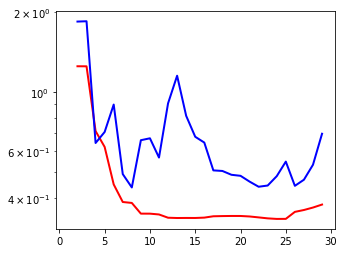

In [53]:
print(degrees.shape)
print(errV.shape)
plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.semilogy(degrees[0:29],errT[0:29],'r-',degrees[0:29],errV[0:29],'b-',linewidth=2);